In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.applications.efficientnet import EfficientNetB6, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
#from keras.optimizers import Adam

In [ ]:
img_width, img_height = 128, 128

In [ ]:
# importa o modelo ResNet50 e descarta a última camada do classifier.
model=EfficientNetB6(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

165249024/165234480 [==============================] - 3s 0us/step


In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False
print(model.output)   

KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_17/Softmax:0', description="created by layer 'dense_17'")


In [ ]:
last_layer = model.get_layer('block4a_dwconv')
print(last_layer.output_shape)

In [ ]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation = 'softmax')(x)
model = Model(model.input, x)

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
directory = '/content/content/data'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4) # set validation split

train_generator = train_datagen.flow_from_directory(
    directory,
    #color_mode='grayscale',
    target_size=(128, 128),
    batch_size=128,
    subset='training') # set as training data

print(directory)
validation_generator = train_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(128, 128),
    #color_mode='grayscale',
    batch_size=128,
    subset='validation') # set as validation data    


Found 93537 images belonging to 10 classes.
/content/content/data
Found 62350 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', 
                                              save_weights_only=False,
                                              monitor='val_accuracy',
                                              mode='max',
                                              save_best_only=True)




In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
history = model.fit_generator(train_generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    callbacks= [callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
731/731 [==============================] - ETA: 0s - loss: 1.7492 - accuracy: 0.4277

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


731/731 [==============================] - 103s 135ms/step - loss: 1.7492 - accuracy: 0.4277 - val_loss: 1.1798 - val_accuracy: 0.6127
Epoch 2/20
731/731 [==============================] - 93s 128ms/step - loss: 1.2267 - accuracy: 0.5732 - val_loss: 0.9895 - val_accuracy: 0.6656
Epoch 3/20
731/731 [==============================] - 98s 134ms/step - loss: 1.0782 - accuracy: 0.6214 - val_loss: 0.8803 - val_accuracy: 0.7091
Epoch 4/20
731/731 [==============================] - 93s 127ms/step - loss: 1.0004 - accuracy: 0.6471 - val_loss: 0.7647 - val_accuracy: 0.7417
Epoch 5/20
731/731 [==============================] - 98s 134ms/step - loss: 0.9305 - accuracy: 0.6715 - val_loss: 0.7020 - val_accuracy: 0.7655
Epoch 6/20
731/731 [==============================] - 98s 134ms/step - loss: 0.8968 - accuracy: 0.6829 - val_loss: 0.6752 - val_accuracy: 0.7761
Epoch 7/20
731/731 [==============================] - 97s 132ms/step - loss: 0.8681 - accuracy: 0.6919 - val_loss: 0.6551 - val_accuracy: 0.

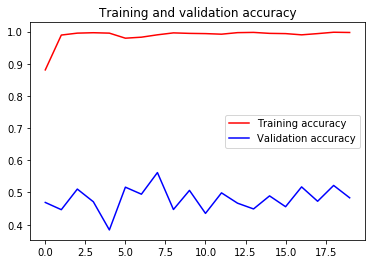

<Figure size 432x288 with 0 Axes>

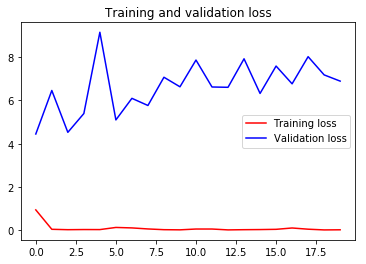

<Figure size 432x288 with 0 Axes>

In [ ]:
# Gráfico do histórico do treino
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# salvar modelo
model.save("model.h5")
print("Modelo salvo em disco dessa instância do Google Colab")

Modelo salvo em disco dessa instância do Google Colab


In [ ]:
# métricas de perda e acurácia
score = model.evaluate_generator(validation_set, 105)

print ("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

loss: 699.08%
acc: 54.27%


In [ ]:
# carregar modelo salvo no HD
from keras.models import load_model

model = load_model('model.h5')

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# visualização das camadas
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_1
5 pool1_pad
6 max_pooling2d_1
7 res2a_branch2a
8 bn2a_branch2a
9 activation_2
10 res2a_branch2b
11 bn2a_branch2b
12 activation_3
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_1
18 activation_4
19 res2b_branch2a
20 bn2b_branch2a
21 activation_5
22 res2b_branch2b
23 bn2b_branch2b
24 activation_6
25 res2b_branch2c
26 bn2b_branch2c
27 add_2
28 activation_7
29 res2c_branch2a
30 bn2c_branch2a
31 activation_8
32 res2c_branch2b
33 bn2c_branch2b
34 activation_9
35 res2c_branch2c
36 bn2c_branch2c
37 add_3
38 activation_10
39 res3a_branch2a
40 bn3a_branch2a
41 activation_11
42 res3a_branch2b
43 bn3a_branch2b
44 activation_12
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_4
50 activation_13
51 res3b_branch2a
52 bn3b_branch2a
53 activation_14
54 res3b_branch2b
55 bn3b_branch2b
56 activation_15
57 res3b_branch2c
58 bn3b_branch2c
59 add_5
60 activation_16
61 res3c_branch2a
62 bn3c_branch2a

In [ ]:
for layer in model.layers[:167]:
   layer.trainable = False
for layer in model.layers[167:]:
   layer.trainable = True

In [ ]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.000001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from google.colab import drive
from keras.callbacks import *

drive.mount('/content/drive')
filepath="/content/drive/My Drive/Colab Notebooks/log/resnet50:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando o modelo com o peso melhor treinado (exemplo: carregando epoch 47, validation accuracy de 90.5%)

model.load_weights('/content/drive/My Drive/Colab Notebooks/log/resnet50:030-val_acc:0.629.hdf5')

In [ ]:
# Fine-tune
history = model.fit_generator(training_set,
                    steps_per_epoch=528/32,
                    epochs = 100,
                    validation_data = validation_set,
                    validation_steps = 105/32,
                    callbacks=callbacks_list)

Epoch 1/100
17/16 [==============================] - 8s 497ms/step - loss: 0.0274 - acc: 0.9963 - val_loss: 7.0440 - val_acc: 0.5524

Epoch 00001: val_acc did not improve from 0.61905
Epoch 2/100
17/16 [==============================] - 3s 186ms/step - loss: 0.0297 - acc: 0.9982 - val_loss: 6.8002 - val_acc: 0.5524

Epoch 00002: val_acc did not improve from 0.61905
Epoch 3/100
17/16 [==============================] - 4s 226ms/step - loss: 1.4234e-04 - acc: 1.0000 - val_loss: 6.7798 - val_acc: 0.5524

Epoch 00003: val_acc did not improve from 0.61905
Epoch 4/100
17/16 [==============================] - 4s 254ms/step - loss: 0.0109 - acc: 0.9963 - val_loss: 6.9305 - val_acc: 0.5524

Epoch 00004: val_acc did not improve from 0.61905
Epoch 5/100
17/16 [==============================] - 4s 247ms/step - loss: 0.1040 - acc: 0.9920 - val_loss: 7.9186 - val_acc: 0.4857

Epoch 00005: val_acc did not improve from 0.61905
Epoch 6/100
17/16 [==============================] - 4s 251ms/step - loss: 1

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


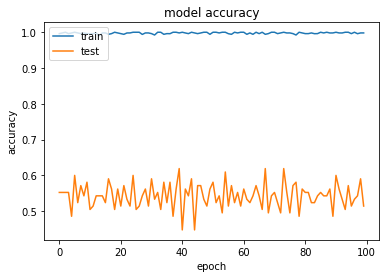

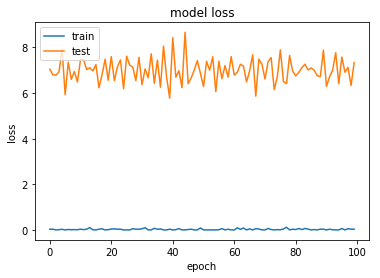

In [ ]:
import matplotlib.pyplot as plt

# listar todos os dados no history
print(history.history.keys())
# Gráfico de treino - acurácia
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Gráfico de treino - perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()